<a href="https://colab.research.google.com/github/mlacasa/Regression/blob/main/PyCaret_Ejemplo_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos PyCaret en Colab, escoger [full] para que cargue xgboost.
!pip install pycaret[full]

# PyCaret

## Capturamos la dataset

La info, aquí

https://pycaret.org/setup/

https://github.com/pycaret/pycaret/tree/master/tutorials

In [1]:
from pycaret.datasets import get_data
data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## decidimos que módulo utilizar, los modelos:

*  1	Classification	from pycaret.classification import *
*  2	Regression	from pycaret.regression import *
*  3	Clustering	from pycaret.clustering import *
* 4	Anomaly Detection	from pycaret.anomaly import *
*  5	Natural Language Processing	from pycaret.nlp import *
*  6	Association Rule Mining	from pycaret.arules import *

In [2]:
from pycaret.regression import *
rg = setup(data = data, target = 'medv') # Seleccionamos la dataset y la variable dependiente.

,Description,Value
0,session_id,4494
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


## Comparamos los modelos

Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

In [3]:
# Qué modelos se comparan?
from pycaret.regression import models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [4]:
# Comparación de modelos, por defecto la comparación es por "R2"
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.0265,8.2239,2.8399,0.8825,0.1379,0.1056,2.932
et,Extra Trees Regressor,2.0379,8.4519,2.8607,0.8782,0.1331,0.1053,0.468
gbr,Gradient Boosting Regressor,2.2354,10.6350,3.1944,0.8495,0.1483,0.1160,0.098
xgboost,Extreme Gradient Boosting,2.2732,10.9083,3.2542,0.8424,0.1540,0.1179,3.073
lightgbm,Light Gradient Boosting Machine,2.3508,11.3346,3.3164,0.8412,0.1555,0.1213,0.092
ada,AdaBoost Regressor,2.5251,11.6404,3.3797,0.8348,0.1657,0.1372,0.113
rf,Random Forest Regressor,2.2663,11.9955,3.3452,0.8321,0.1508,0.1176,0.515
lr,Linear Regression,3.4088,24.6021,4.8994,0.6540,0.2536,0.1732,0.333
ridge,Ridge Regression,3.3873,24.9813,4.9284,0.6480,0.2527,0.1733,0.014
br,Bayesian Ridge,3.4291,25.8064,5.0095,0.6363,0.2475,0.1754,0.016


In [5]:
# Queremos saber los 3 mejores modelos basados en R2
top3 = compare_models(n_select=3, sort='RMSE', verbose=False)

In [6]:
top3 # Los 3 modelos, con los parámetros escogidos.

 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4494, verbose=0, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='de

In [7]:
# Si queremos comparar modelos específicos
best_specific = compare_models(include = ['lr','rf','et'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0379,8.4519,2.8607,0.8782,0.1331,0.1053,0.451
rf,Random Forest Regressor,2.2663,11.9955,3.3452,0.8321,0.1508,0.1176,0.519
lr,Linear Regression,3.4088,24.6021,4.8994,0.6540,0.2536,0.1732,0.015


In [8]:
# elimino algunos modelos
best_excepto = compare_models(exclude = ['catboost', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0379,8.4519,2.8607,0.8782,0.1331,0.1053,0.458
gbr,Gradient Boosting Regressor,2.2354,10.6350,3.1944,0.8495,0.1483,0.1160,0.100
lightgbm,Light Gradient Boosting Machine,2.3508,11.3346,3.3164,0.8412,0.1555,0.1213,0.042
ada,AdaBoost Regressor,2.5251,11.6404,3.3797,0.8348,0.1657,0.1372,0.114
rf,Random Forest Regressor,2.2663,11.9955,3.3452,0.8321,0.1508,0.1176,0.517
lr,Linear Regression,3.4088,24.6021,4.8994,0.6540,0.2536,0.1732,0.014
ridge,Ridge Regression,3.3873,24.9813,4.9284,0.6480,0.2527,0.1733,0.015
br,Bayesian Ridge,3.4291,25.8064,5.0095,0.6363,0.2475,0.1754,0.016
lar,Least Angle Regression,3.6643,27.3627,5.1460,0.6185,0.2729,0.1863,0.020
en,Elastic Net,3.8281,30.0769,5.4183,0.5890,0.2578,0.1850,0.018


## Construyo el modelo

In [9]:
xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id=0)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2686,9.3491,3.0576,0.8966,0.1526,0.1168
1,2.0710,9.0793,3.0132,0.8709,0.1521,0.1114
2,2.0974,6.9253,2.6316,0.9375,0.1229,0.1020
3,2.1732,8.0145,2.8310,0.8820,0.1398,0.1137
4,2.0936,6.8567,2.6185,0.8195,0.1510,0.1255
5,2.3743,8.6155,2.9352,0.9292,0.1674,0.1233
6,2.4937,14.2590,3.7761,0.7851,0.1713,0.1276
7,2.5837,12.6462,3.5561,0.8457,0.1568,0.1249
8,2.8235,19.7765,4.4471,0.6839,0.2002,0.1720
9,2.3992,18.5968,4.3124,0.6693,0.1561,0.0978


In [20]:
print(xgboost_gpu)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4494, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)


## Afinamos el modelo

In [28]:
xgboost_tuned = tune_model(xgboost_gpu, n_iter=100) # default n_iter = 10

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2846,9.6808,3.1114,0.8930,0.1360,0.1090
1,1.8427,8.2877,2.8788,0.8821,0.1591,0.1071
2,1.9489,6.5480,2.5589,0.9409,0.1250,0.0988
3,1.4813,5.3655,2.3164,0.9210,0.0910,0.0701
4,1.8158,4.9845,2.2326,0.8688,0.1243,0.1054
5,2.5802,11.9039,3.4502,0.9021,0.1273,0.1102
6,2.1769,10.5610,3.2498,0.8408,0.1399,0.1095
7,2.4058,10.3130,3.2114,0.8741,0.1463,0.1186
8,2.6702,17.1581,4.1422,0.7258,0.1897,0.1636
9,2.5598,14.5982,3.8208,0.7404,0.1541,0.1058


In [29]:
print(xgboost_tuned)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=11,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4494, reg_alpha=0.01,
             reg_lambda=0.2, scale_pos_weight=48.900000000000006, subsample=0.9,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)


In [34]:
# Vamos a escoger parámetros

params = {
    "max_depth": range(10,20,2),
    "gamma":range(2,10,2),
    "learning_rate":[0.1,0.2,0.3],
}

tuned_xgb_custom = tune_model(xgboost_tuned, custom_grid = params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3673,10.8854,3.2993,0.8797,0.1437,0.1148
1,1.8735,8.4268,2.9029,0.8801,0.1540,0.1055
2,1.9855,6.0685,2.4634,0.9453,0.1216,0.1007
3,1.6725,5.7505,2.3980,0.9153,0.1041,0.0850
4,1.7839,4.6861,2.1648,0.8767,0.1235,0.1067
5,2.7512,13.4519,3.6677,0.8894,0.1384,0.1188
6,2.2035,10.0123,3.1642,0.8491,0.1290,0.1057
7,2.3575,9.7659,3.1250,0.8808,0.1435,0.1163
8,2.6236,14.2783,3.7787,0.7718,0.1787,0.1573
9,2.5194,14.9317,3.8642,0.7345,0.1547,0.1038


In [35]:
print(tuned_xgb_custom)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=8, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4494, reg_alpha=0.01,
             reg_lambda=0.2, scale_pos_weight=48.900000000000006, subsample=0.9,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)


In [36]:
#Ensamble model

xgb_ensambled = ensemble_model(tuned_xgb_custom, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5967,15.1817,3.8964,0.8322,0.1690,0.1311
1,2.2114,12.3053,3.5079,0.8250,0.1776,0.1264
2,2.0539,6.8680,2.6207,0.9381,0.1162,0.0993
3,1.7077,5.9328,2.4357,0.9126,0.1082,0.0849
4,1.9047,5.5052,2.3463,0.8551,0.1363,0.1165
5,2.6816,11.8284,3.4392,0.9028,0.1364,0.1186
6,1.8904,6.3270,2.5154,0.9046,0.1080,0.0912
7,2.3327,9.9163,3.1490,0.8790,0.1445,0.1175
8,2.6592,18.3278,4.2811,0.7071,0.1987,0.1683
9,2.4020,18.3402,4.2825,0.6739,0.1503,0.0935


In [37]:
# Blending models

catboost = create_model('catboost') #escogemos 2 modelos a ensamblar
et = create_model('et')

blender = blend_models(estimator_list = [tuned_xgb_custom, catboost, et]) #instanciamos



,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0929,8.1821,2.8604,0.9095,0.1444,0.1101
1,1.7585,7.4302,2.7258,0.8943,0.1444,0.1016
2,1.8615,5.2637,2.2943,0.9525,0.1117,0.0937
3,1.5833,5.6098,2.3685,0.9174,0.0991,0.0785
4,1.6431,4.2351,2.0579,0.8885,0.1269,0.1038
5,2.3123,9.4381,3.0721,0.9224,0.1255,0.1047
6,1.9325,6.6817,2.5849,0.8993,0.1158,0.0944
7,2.3401,9.3598,3.0594,0.8858,0.1490,0.1176
8,2.3306,12.2112,3.4944,0.8048,0.1657,0.1418
9,2.1717,13.3278,3.6507,0.7630,0.1377,0.0872


In [38]:
print(blender.estimators_)

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=8, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4494, reg_alpha=0.01,
             reg_lambda=0.2, scale_pos_weight=48.900000000000006, subsample=0.9,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0), <catboost.core.CatBoostRegressor object at 0x7f418afe1690>, ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min

In [39]:
# Stacking de los anteriores top3 modelos

stacker = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9463,5.8796,2.4248,0.9350,0.1452,0.1094
1,1.6550,6.1827,2.4865,0.9121,0.1254,0.0919
2,1.5164,3.8372,1.9589,0.9654,0.1034,0.0831
3,1.8629,6.5689,2.5630,0.9032,0.1139,0.0948
4,1.7001,4.6687,2.1607,0.8771,0.1235,0.0973
5,2.3840,7.9193,2.8141,0.9349,0.1851,0.1241
6,2.2419,9.0769,3.0128,0.8632,0.1358,0.1066
7,2.5972,10.9450,3.3083,0.8664,0.1559,0.1270
8,2.2147,12.0856,3.4764,0.8068,0.1480,0.1200
9,2.0020,11.7852,3.4330,0.7904,0.1282,0.0815


In [40]:
# O seguimos utilizando el Xgboost stacking, nuestro mejor modelo es blender con un 0.88 en R2

stacker2 = stack_models(top3, meta_model = blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0052,6.8852,2.6240,0.9239,0.1562,0.1155
1,1.9182,9.1704,3.0283,0.8696,0.1615,0.1114
2,1.8097,5.6647,2.3801,0.9489,0.1159,0.0927
3,1.6686,6.8265,2.6128,0.8995,0.1094,0.0821
4,1.7058,4.5351,2.1296,0.8806,0.1243,0.1038
5,1.9767,6.1979,2.4896,0.9490,0.1272,0.1009
6,2.1646,7.9423,2.8182,0.8803,0.1224,0.1017
7,2.3643,9.3096,3.0512,0.8864,0.1581,0.1247
8,2.3673,17.7349,4.2113,0.7166,0.1819,0.1462
9,2.1258,11.8418,3.4412,0.7894,0.1288,0.0840


## Plots

https://pycaret.org/plot-model/

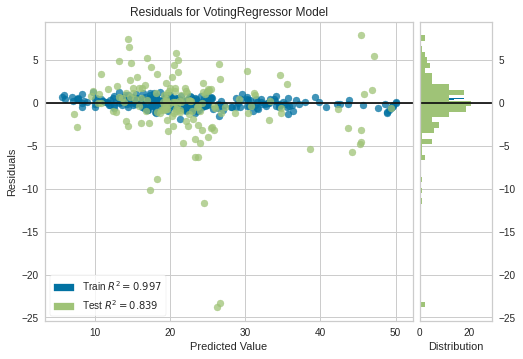

In [42]:
plot_model(blender, plot = 'residuals')

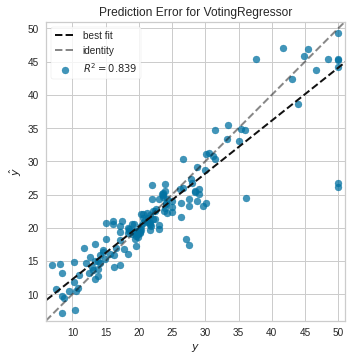

In [44]:
plot_model(blender, plot = 'error')

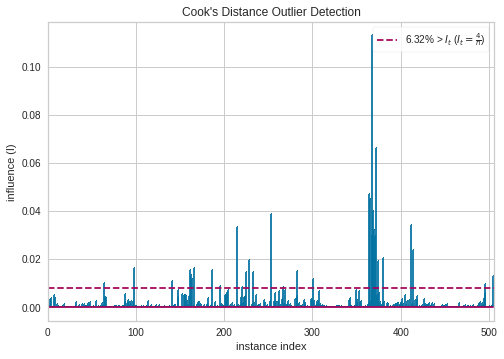

In [45]:
plot_model(blender, plot = 'cooks')# Requiere feature engineering, hay que evaluar outliers.

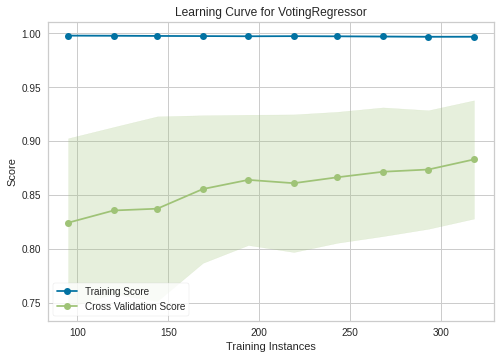

In [47]:
plot_model(blender, plot = 'learning')

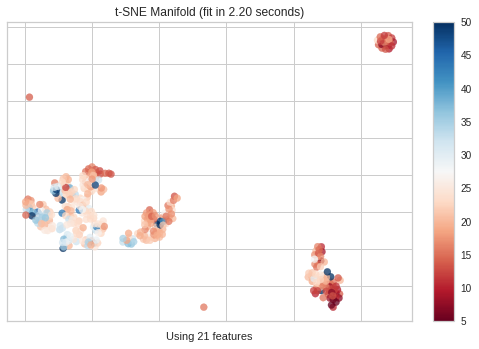

In [49]:
plot_model(blender, plot = 'manifold')